# Natural Language Processing
---------------------------------------------------

This example shows how to use ATOM to quickly go from raw text data to model predictions.

Import the 20 newsgroups text dataset from [sklearn.datasets](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). The dataset comprises around 18000 articles on 20 topics. The goal is to predict the topic of every article.

## Load the data

In [1]:
import numpy as np
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Use only a subset of the available topics for faster processing
X_text, y_text = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
    shuffle=True,
    random_state=1,
)
X_text = np.array(X_text).reshape(-1, 1)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X_text, y_text, test_size=0.3, verbose=2, warnings=False)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ==================== >>
Shape: (2846, 2)
Memory: 5.13 MB
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 1993
Test set size: 853
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   593 (1.2) |   415 (1.2) |   178 (1.2) |
| 2 |   585 (1.2) |   410 (1.2) |   175 (1.2) |
| 3 |   594 (1.2) |   416 (1.2) |   178 (1.2) |
| 4 |   594 (1.2) |   416 (1.2) |   178 (1.2) |



In [4]:
atom.dataset  # Note that the feature is automatically named 'corpus'

,corpus,target
0,From: worsham@aer.com. (Robert D. Worsham)\nSu...,2
1,From: jnielsen@magnus.acs.ohio-state.edu (John...,4
2,From: rdb1@cbnewsj.cb.att.com (ronald.j.debloc...,3
3,From: mmc@cs.rit.edu (Mahendra M Chheda)\nSubj...,1
4,From: drand@spinner.osf.org (Douglas S. Rand)\...,1
...,...,...
2841,From: rmt6r@faraday.clas.Virginia.EDU (Roy Mat...,3
2842,From: gmiller@worldbank.org (Gene C. Miller)\n...,0
2843,From: lofaso@tsd.arlut.utexas.edu (Bernie Lofa...,3
2844,From: jmatkins@quads.uchicago.edu (Jonny A (Vo...,2


In [5]:
# Let's have a look at the first document
atom.corpus[0]

'From: worsham@aer.com. (Robert D. Worsham)\nSubject: Tektronix Equipment: Color Terminal, Printer, Rasterizer & Supplies\nSummary: Tektronix Equipment/Supplies for sale\nKeywords: color, printer, terminal, rasterizer, tektronix\nOrganization: Atmospheric & Environmental Research, Inc.\nLines: 27\n\n  For Sale:\n\n      Tektronix 4208 Color Terminal\n      Tektronix 4510A Rasterizer\n      Tektronix 4692 InkJet Printer\n\n      Tektronix 4692 Printer Extras (all Tektronix products):\n\n        Paper (> 3 boxes)\n        Transparencies (> 2 boxes)\n        Maintenance Cartridges (2 cart)\n        Magenta Ink Cartridge (1 cart)\n\n  We would like to sell as a single lot, and preference\n  will be given to offers for the entire list.  All offers\n  accepted, best offer gets the equipment.\n\n  -- Bob\n\n  ____________________________________________________________________\n  Robert D. Worsham  (Bob)                   | email:  worsham@aer.com\n  Atmospheric & Environmental Research Inc. 

In [6]:
# Clean the documents from noise (emails, numbers, etc...)
atom.textclean()

Filtering the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [7]:
# Have a look at the removed items
atom.drops

,email,url,html,emoji,number
0,"[worsham@aer.com., worsham@aer.com]",NaN,NaN,NaN,"[27, 4208, 4692, 4692, 3, 2, 2, 1, 617, 547, 6..."
1,"[jnielsen@magnus.acs.ohio-state.edu, noringc5u...",NaN,[<>],NaN,"[45, 2]"
2,"[rdb1@cbnewsj.cb.att.com, 1pq8tkinnbek@chester...",NaN,[<>],NaN,"[171209, 13913, 15, 1]"
3,"[mmc@cs.rit.edu, mmc@cs.rit.edu, mmc7274@ritva...",NaN,NaN,NaN,"[4, 1, 2, 3, 0, 440, 14623, 716, 475, 2079, 71..."
4,"[drand@spinner.osf.org, nicholas@ibmpcug.co.uk...",NaN,"[<>, <>]",NaN,"[22, 1993, 17, 17, 40, 40, 1, 2, 1, 2, 11, 02142]"
...,...,...,...,...,...
1249,NaN,NaN,NaN,NaN,"[27, 15, 27, 225, 250, 412, 624, 6115, 371, 0154]"
1808,NaN,NaN,NaN,NaN,"[223, 250, 10, 8, 8, 2002, 1600]"
2206,NaN,NaN,NaN,NaN,"[38, 84]"
2548,NaN,NaN,NaN,NaN,"[15, 1, 1, 1097, 08836, 908, 563, 9033, 908, 5..."


In [8]:
# Check how the first document changed
atom.corpus[0]

'from  robert d worsham\nsubject tektronix equipment color terminal printer rasterizer  supplies\nsummary tektronix equipmentsupplies for sale\nkeywords color printer terminal rasterizer tektronix\norganization atmospheric  environmental research inc\nlines \n\n  for sale\n\n      tektronix  color terminal\n      tektronix 450a rasterizer\n      tektronix  inkjet printer\n\n      tektronix  printer extras all tektronix products\n\n        paper   boxes\n        transparencies   boxes\n        maintenance cartridges  cart\n        magenta ink cartridge 1 cart\n\n  we would like to sell as a single lot and preference\n  will be given to offers for the entire list  all offers\n  accepted best offer gets the equipment\n\n   bob\n\n  \n  robert d worsham  bob                    email  \n  atmospheric  environmental research inc   voice   \n   memorial drive                            fax   \n  cambridge ma  usa                    \n\n\n\n'

In [9]:
# Convert the strings to a sequence of words
atom.tokenize()

Tokenizing the corpus...


In [10]:
# Print the first few words of the first document
atom.corpus[0][:7]

['from', 'robert', 'd', 'worsham', 'subject', 'tektronix', 'equipment']

In [11]:
# Normalize the text to a predefined standard
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


In [12]:
atom.corpus[0][:7]  # Check changes...

['robert', 'worsham', 'subject', 'tektronix', 'equipment', 'color', 'terminal']

In [13]:
# Visualize the most common words with a wordcloud
atom.plot_wordcloud()

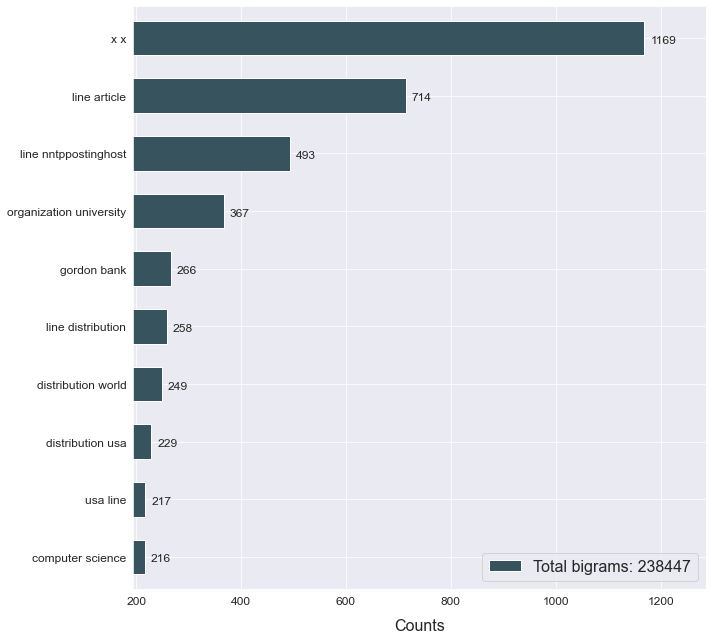

In [14]:
# Have a look at the most frequent bigrams
atom.plot_ngrams(2)

In [15]:
# Create the bigrams using the tokenizer
atom.tokenize(bigram_freq=215)

Tokenizing the corpus...
 --> Creating 10 bigrams on 4178 locations.


In [16]:
atom.bigrams

,bigram,frequency
9,"(x, x)",1169
0,"(line, article)",714
5,"(line, nntppostinghost)",493
2,"(organization, university)",367
7,"(gordon, bank)",266
3,"(line, distribution)",258
6,"(distribution, world)",249
4,"(distribution, usa)",229
8,"(usa, line)",217
1,"(computer, science)",216


In [17]:
# As a last step before modelling, convert the words to vectors
atom.vectorize(strategy="tf-idf")

Vectorizing the corpus...


In [18]:
# The dimensionality of the dataset has increased a lot!
atom.shape

(2846, 27948)

In [19]:
# Note that the data is sparse and the columns are named
# after the words they are embedding
atom.dtypes

00          Sparse[float64, 0]
000         Sparse[float64, 0]
000000e5    Sparse[float64, 0]
00000ee5    Sparse[float64, 0]
000010af    Sparse[float64, 0]
                   ...        
zurlo       Sparse[float64, 0]
zvi         Sparse[float64, 0]
zx          Sparse[float64, 0]
zzzs        Sparse[float64, 0]
target_y                 int64
Length: 27948, dtype: object

In [20]:
# When the dataset is sparse, stats() shows the sparsity
atom.stats()

Dataset stats ==================== >>
Shape: (2846, 27948)
Memory: 3.10 MB
Sparse: True
Density: 0.32%
-------------------------------------
Train set size: 1993
Test set size: 853
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   593 (1.2) |   415 (1.2) |   178 (1.2) |
| 2 |   585 (1.2) |   410 (1.2) |   175 (1.2) |
| 3 |   594 (1.2) |   416 (1.2) |   178 (1.2) |
| 4 |   594 (1.2) |   416 (1.2) |   178 (1.2) |


In [21]:
# Check which models have support for sparse matrices
atom.available_models()[["acronym", "fullname", "accepts_sparse"]]

,acronym,fullname,accepts_sparse
0,Dummy,Dummy Estimator,False
1,GP,Gaussian Process,False
2,GNB,Gaussian Naive Bayes,False
3,MNB,Multinomial Naive Bayes,True
4,BNB,Bernoulli Naive Bayes,True
5,CatNB,Categorical Naive Bayes,True
6,CNB,Complement Naive Bayes,True
7,Ridge,Ridge Estimator,True
8,Perc,Perceptron,False
9,LR,Logistic Regression,True


In [22]:
# Train the model
atom.run(models="MLP", metric="f1_weighted")


Training ========================= >>
Models: MLP
Metric: f1_weighted


Results for Multi-layer Perceptron:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 0.9695
Time elapsed: 1m:37s
-------------------------------------------------
Total time: 1m:37s


Final results ==================== >>
Duration: 1m:37s
-------------------------------------
Multi-layer Perceptron --> f1_weighted: 0.9695


## Analyze results

In [23]:
atom.evaluate()

,balanced_accuracy,f1_weighted,jaccard_weighted,matthews_corrcoef,precision_weighted,recall_weighted
MLP,0.970102,0.969495,0.941408,0.961948,0.969894,0.969519


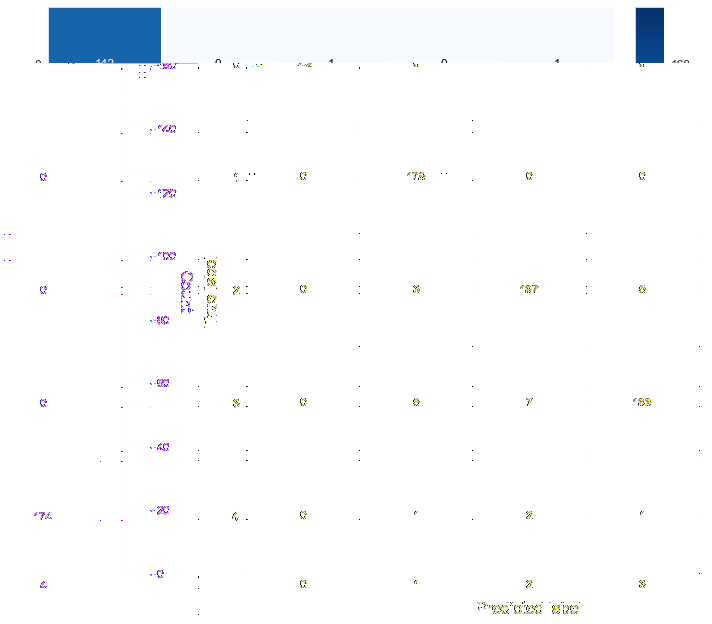

In [24]:
atom.plot_confusion_matrix(figsize=(10, 10))